# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [4]:
#import numpy and pandas
import numpy as np
import pandas as pd


# Challenge 1 - The `stats` Submodule

This submodule contains statistical functions for conducting hypothesis tests, producing various distributions and other useful tools. Let's examine this submodule using the KickStarter dataset. We will load the dataset below.

In [5]:
# Run this code:

kickstarter = pd.read_csv('../ks-projects-201801.csv')

Now print the `head` function to examine the dataset.

In [6]:
# Your code here:
kickstarter.head()


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Import the `mode` function from `scipy.stats` and find the mode of the `country` and `currency` column.

In [7]:
# Your code here:
from scipy.stats import mode
print(mode(kickstarter['country']))
print(mode(kickstarter['currency']))

ModeResult(mode=array(['US'], dtype=object), count=array([292627]))
ModeResult(mode=array(['USD'], dtype=object), count=array([295365]))


The trimmed mean is a function that computes the mean of the data with observations removed. The most common way to compute a trimmed mean is by specifying a percentage and then removing elements from both ends. However, we can also specify a threshold on both ends. The goal of this function is to create a more robust method of computing the mean that is less influenced by outliers. SciPy contains a function called `tmean` for computing the trimmed mean. 

In the cell below, import the `tmean` function and then find the 75th percentile of the `goal` column. Compute the trimmed mean between 0 and the 75th percentile of the column. Read more about the `tmean` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tmean.html#scipy.stats.tmean).

In [8]:
# Your code here:
from scipy.stats import tmean
seventyfive_perc = np.percentile(kickstarter['goal'],75)
seventyfive_perc

16000.0

In [9]:
# Otra forma de calcular el percentil, con Pandas:
kickstarter['goal'].quantile(q=0.75)

16000.0

In [10]:
tmean(kickstarter['goal'], (0,seventyfive_perc))

4874.150287106898

In [11]:
kickstarter['goal'].mean()

49080.79152056851

In [12]:
# tmean es menor que mean.
# Tiene lógica, ya que hemos despreciado todos los valores que están por encima del tercer cuartil.

#### SciPy contains various statistical tests. One of the tests is Fisher's exact test. This test is used for contingency tables. 

The test originates from the "Lady Tasting Tea" experiment. In 1935, Fisher published the results of the experiment in his book. The experiment was based on a claim by Muriel Bristol that she can taste whether tea or milk was first poured into the cup. Fisher devised this test to disprove her claim. The null hypothesis is that the treatments do not affect outcomes, while the alternative hypothesis is that the treatment does affect outcome. To read more about Fisher's exact test, click [here](https://en.wikipedia.org/wiki/Fisher%27s_exact_test).

Let's perform Fisher's exact test on our KickStarter data. We intend to test the hypothesis that the choice of currency has an impact on meeting the pledge goal. We'll start by creating two derived columns in our dataframe. The first will contain 1 if the amount of money in `usd_pledged_real` is greater than the amount of money in `usd_goal_real`. We can compute this by using the `np.where` function. If the amount in one column is greater than the other, enter a value of 1, otherwise enter a value of zero. Add this column to the dataframe and name it `goal_met`.

In [13]:
# Your code here:
kickstarter['goal_met'] = np.where(kickstarter['usd_pledged_real'] > kickstarter['usd_goal_real'], 1, 0)

Next, create a column that checks whether the currency of the project is in US Dollars. Create a column called `usd` using the `np.where` function where if the currency is US Dollars, assign a value of 1 to the row and 0 otherwise.

In [14]:
# Your code here:
kickstarter['usd'] = np.where(kickstarter['currency'] == 'USD', 1, 0)

In [15]:
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,goal_met,usd
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0,1
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0,1
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0,1


Now create a contingency table using the `pd.crosstab` function in the cell below to compare the `goal_met` and `usd` columns.

Import the `fisher_exact` function from `scipy.stats` and conduct the hypothesis test on the contingency table that you have generated above. You can read more about the `fisher_exact` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html#scipy.stats.fisher_exact). The output of the function should be the odds ratio and the p-value. The p-value will provide you with the outcome of the test.

In [16]:
# Your code here:
ct = pd.crosstab(kickstarter['goal_met'], kickstarter['usd'])
ct

usd,0,1
goal_met,,
0,58685,187130
1,24611,108235


In [17]:
from scipy.stats import fisher_exact
oddsratio, pvalue = fisher_exact(ct)
pvalue

9.78e-321

Este valor de p (pvalue) indica la probabilidad de obtener una diferencia entre los grupos mayor o igual a la observada, bajo la hipótesis nula de independencia. Si esta probabilidad es pequeña (p<0.05) se deberá rechazar la hipótesis de partida y deberemos asumir que las dos variables no son independientes, sino que están asociadas. En caso contrario, se dirá que no existe evidencia estadística de asociación entre ambas variables.<br>
<br>
Como 9.78e-321 es un valor muy cercano a cero, podemos concluir que **las variables goal_met y usd están significativamente relacionadas**. Esto signfica que es más fácil conseguir financiación si la divisa es USD.

### Test chi-cuadrado de Pearson o test de independencia

Debido a los requerimientos de cálculo del test de Fisher, cuando hay muchas observaciones o muchos niveles, se emplea el test χ2 de independencia, que tiene menos coste computacional.<br>
Es un test aproximado y se podría sustituir por el de Fisher en este caso, ya que los valores de la tabla de contingencia cumple las condiciones necesarias para poder aplicar este test (todos los valores de la tabla deben ser mayor o igual que 5, es decir, debe haber al menos 5 eventos por cada nivel). No tiene mucho sentido, ya que el de Fisher es exacto y ya tenemos el resultado de dependencia, pero tengo curiosidad por usar la función.

In [18]:
from scipy.stats import chi2_contingency
g, p, dof, expctd = chi2_contingency(ct)
g, p, dof, expctd # chi2, p, degrees of freedom, expected frequencies

(1437.0150092842616, 0.0, 1, array([[ 54073.18482759, 191741.81517241],
        [ 29222.81517241, 103623.18482759]]))

El valor p es una probabilidad que mide la evidencia en contra de la hipótesis nula. Las probabilidades más bajas proporcionan una evidencia más fuerte en contra de la hipótesis nula.
P tiene un valor de 0, que está por debajo de 0,05 (nivel de insignificancia), por lo que estamos rechazando la hipótesis nula y concluyendo que **hay una asociación estadísticamente significativa entre las variables.**

# Challenge 2 - The `linalg` submodule

This submodule allows us to perform various linear algebra calculations. 

Using the solve function, find the solution of the equation system 5x + 2y = 3 and 3x + y = 2 in the cell below.

In [19]:
# Your code here:
from numpy import linalg
# Es como una ecuación matricial -> matriz_a * ([x,y]) = matriz_b
a = np.array([[5,2], [3,1]])
b = np.array([3,2])
linalg.solve(a,b)

array([ 1., -1.])

# Challenge 3 - The `interpolate` submodule

This submodule allows us to interpolate between two points and create a continuous distribution based on the observed data.

In the cell below, import the `interp1d` function and first take a sample of 10 rows from `kickstarter`. 

In [49]:
# Your code here:
from scipy.interpolate import interp1d
ks_sample = kickstarter.sample(10)
ks_sample

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,goal_met,usd
164074,183489210,"""Gay""ry Tales - A Comic of Gay Fairy Tales",Comics,Comics,USD,2011-06-30,25400.0,2011-05-01 02:59:47,20.0,failed,2,US,20.00,20.00,25400.00,0,1
219378,2117443470,NOTHING,Film & Video,Film & Video,USD,2015-06-08,2000.0,2015-05-18 01:16:46,528.0,undefined,0,"N,0""",NaN,528.00,2000.00,0,1
200152,2019266511,Mechalarum: A Science Fiction Novel,Fiction,Publishing,USD,2013-03-30,6900.0,2013-02-25 22:40:26,7115.0,successful,74,US,7115.00,7115.00,6900.00,1,1
297666,585623273,The Color Feast Beasts,Children's Books,Publishing,USD,2012-10-06,21000.0,2012-08-22 14:10:31,5003.0,failed,86,US,5003.00,5003.00,21000.00,0,1
213291,2087043398,Studyshare,Web,Technology,USD,2015-02-06,25000.0,2015-01-07 19:39:34,1.0,failed,1,US,1.00,1.00,25000.00,0,1
334331,773057233,"Sorry, I'm Illegal - After All These Years",Nonfiction,Publishing,USD,2014-11-03,6000.0,2014-10-03 03:54:26,16.0,failed,2,US,16.00,16.00,6000.00,0,1
236823,273838010,Cain,Film & Video,Film & Video,USD,2012-11-13,5000.0,2012-10-01 23:51:18,0.0,failed,0,US,0.00,0.00,5000.00,0,1
66465,1338064961,Red Trap God clothing line.,Apparel,Fashion,USD,2015-06-21,5000.0,2015-05-07 23:55:45,0.0,failed,0,US,0.00,0.00,5000.00,0,1
315544,677264466,I-Tem brand Wine Dispenser,Product Design,Design,USD,2017-07-07,600000.0,2017-05-23 22:39:39,145.0,failed,4,US,15.00,145.00,600000.00,0,1
335664,779907528,MP3 music player for Ear Training prototype: g...,Music,Music,GBP,2015-12-06,24000.0,2015-11-06 16:01:09,24.0,failed,1,GB,36.92,36.38,36378.52,0,0


Next, create a linear interpolation of the backers as a function of `usd_pledged_real`. Create a function `f` that generates a linear interpolation of backers as predicted by the amount of real pledged dollars.

In [67]:
# Your code here:
f = interp1d(ks_sample['backers'].values, ks_sample['usd_pledged_real'].values, assume_sorted=False)

Now create a new variable called `x_new`. This variable will contain all integers between the minimum number of backers in our sample and the maximum number of backers. The goal here is to take the dataset that contains few obeservations due to sampling and fill all observations with a value using the interpolation function. 

Hint: one option is the `np.arange` function.

In [68]:
# Your code here:
x_new = np.arange(ks_sample['backers'].min(), ks_sample['backers'].max())
x_new

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85])

Plot function f for all values of `x_new`. Run the code below.

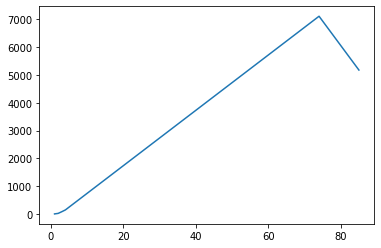

In [69]:
# Run this code:

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_new, f(x_new))

Next create a function that will generate a cubic interpolation function. Name the function `g`

In [66]:
# Your code here:
g = interp1d(ks_sample['backers'].values, ks_sample['usd_pledged_real'].values, assume_sorted=False, kind="cubic")

ValueError: Expect x to be a 1-D sorted array_like.

In [64]:
# Run this code:

plt.plot(x_new, g(x_new))

TypeError: 'numpy.float64' object is not callable

# Bonus Challenge - The Binomial Distribution

The binomial distribution allows us to calculate the probability of k successes in n trials for a random variable with two possible outcomes (which we typically label success and failure).  

The probability of success is typically denoted by p and the probability of failure is denoted by 1-p.

The `scipy.stats` submodule contains a `binom` function for computing the probabilites of a random variable with the binomial distribution. You may read more about the binomial distribution [here](https://en.wikipedia.org/wiki/Binomial_distribution) and about the `binom` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom).

In the cell below, compute the probability that a die lands on 5 exactly 3 times in 8 tries.

Hint: the probability of rolling a 5 is 1/6.

In [ ]:
# Your code here:

